# Metodo Kohonen
### Entrenamiento
Primero entrenamos el conjunto y obtenemos la red

In [4]:
import numpy as np
from types import Tuple

class Neuron:
    def __init__(self, weights: list, count: int, position: Tuple[int,int]):
        self.weights = weights
        self.count = count
        self.elements = np.array([])
        self.position = position
                 
    def add_element(self, elem):
        self.elements = np.append(self.elements,elem)
        
    def get_weights(self):
        return self.weights

ImportError: cannot import name 'Tuple' from 'types' (/usr/lib/python3.8/types.py)

In [ ]:
import numpy as np
from get_data import data, raw_data

#Paso Inicial: Inicializo valores

k = 3
p = len(raw_data)
labels = raw_data.columns[1:]
countries = raw_data.values[:,0]
n = data.shape[1]

def set_init_weights():
  w = []
  for _ in range(0,k*k):
    i = np.random.randint(len(data))
    wi = data[i]
    w.append(wi)
  return np.array(w)

weights = set_init_weights()
grid = np.empty((k,k), Neuron)
index = 0
for i in range(k):
    for j in range(k):
        grid[i][j] = Neuron(weights[index],0,(i,j))
        index += 1

def update_neighborhood_weight(radius, w_k):
  umbral = weights[w_k]
  res = []
  for i in range(len(weights)):
    if i != w_k and np.linalg.norm(weights[i] - umbral) < radius:
      res.append(i)
  return np.array(res)

init_learn_rate = 0.1
init_radius = 2
max_epochs = 100

  #Paso Inicial
radius = init_radius
learn_rate = init_learn_rate
t = 1
cut = False
#Paso t
while t < max_epochs and not cut:
  #Paso 1: Selecciono un registro de entrada Xp
  x_index = np.random.choice(range(data.shape[0]))
  x = data[x_index]
  #Paso 2: Encontrar la neurona ganadora
  aux = []
  for row in grid:
    for neu in row:
        aux.append(np.linalg.norm(x-neu.weights))
  aux = np.array(aux)
  w_k = np.argmin(aux)
  #Paso 3: Actualizar los pesos de las neuronas vecinas
  n_k = update_neighborhood_weight(radius,w_k)
  
  for i in range(k):
    for j in range(k):
        if (j in n_k):
          weights[j] = weights[j] + learn_rate * (x-weights[j])
          grid[i][j].weights = weights
  t += 1


not normalized:  [[83871 41600 3.5 79.91 0.8 0.03 4.2]
 [30528 37800 3.5 79.65 1.3 0.06 7.2]
 [110879 13800 4.2 73.84 2.6 -0.8 9.6]
 [56594 18000 2.3 75.99 2.39 -0.09 17.7]
 [78867 27100 1.9 77.38 1.15 -0.13 8.5]
 [43094 37000 2.8 78.78 1.3 0.24 6.1]
 [45228 20400 5.0 73.58 2.0 -0.65 12.5]
 [338145 36000 3.3 79.41 2.0 0.07 7.8]
 [357022 38100 2.5 80.19 1.5 -0.2 6.0]
 [131957 26300 3.3 80.05 4.3 0.06 17.4]
 [93028 19600 3.9 75.02 1.75 -0.18 10.9]
 [103000 38100 4.0 81.0 0.0 0.67 7.4]
 [70273 40800 2.6 80.32 0.9 1.11 14.4]
 [301340 30500 2.9 81.86 1.8 0.38 8.4]
 [64589 16800 4.4 72.93 1.1 -0.6 12.8]
 [65300 19100 4.1 75.55 0.9 -0.28 15.4]
 [2586 80600 3.4 79.75 0.9 1.14 5.7]
 [41543 42000 2.3 80.91 1.6 0.45 4.4]
 [323802 53400 1.3 80.32 1.9 0.33 3.3]
 [312685 20200 4.2 76.25 1.9 -0.08 12.4]
 [92090 23400 3.7 78.7 2.3 0.18 12.7]
 [49035 23300 3.9 76.03 1.08 0.1 13.2]
 [20273 28800 1.8 77.48 1.7 -0.19 11.8]
 [505370 30500 3.1 81.27 1.2 0.65 21.7]
 [450295 40700 3.0 81.18 1.5 0.17 7.5]
 [41

### Visualizacion y analisis
Luego observamos y analizamos los datos obtenidos

Neurona ( 0 , 0 ) tiene a: 
 ['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Czech Republic' 'Denmark'
 'Estonia' 'Finland' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom' 'Bulgaria' 'Croatia' 'Czech Republic' 'Hungary' 'Latvia'
 'Lithuania' 'Portugal'] 
  35  paises en total 

Neurona ( 0 , 1 ) tiene a: 
 ['Finland' 'Germany' 'Italy' 'Norway' 'Poland' 'Spain' 'Sweden' 'Ukraine'
 'United Kingdom' 'United Kingdom'] 
  10  paises en total 

Neurona ( 0 , 2 ) tiene a: 
 ['Belgium' 'Denmark' 'Estonia' 'Luxembourg' 'Netherlands' 'Slovakia'
 'Slovenia' 'Switzerland' 'Belgium' 'Denmark' 'Estonia' 'Netherlands'
 'Slovakia' 'Switzerland'] 
  14  paises en total 

Neurona ( 1 , 0 ) tiene a: 
 ['Germany' 'Spain' 'Sweden' 'Ukraine' 'Spain' 'Sweden' 'Ukraine'] 
  7  paises en total 

Neurona ( 1 , 1 ) tiene a: 
 ['Luxembourg' 'Slovenia' 

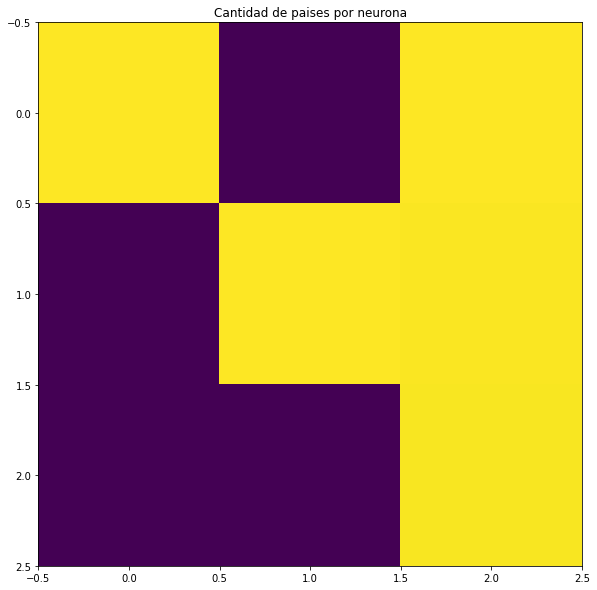

In [5]:
import numpy as np
import matplotlib.pylab as plt

k = 3
values = np.empty((k,k), int)
# agregar ax y seaborn para agregar paises dentro del heatmap

index = -1
for entrie in data:
    min_position = (0,0)
    min_dist = 999
    index += 1
    for row in grid:
        for col in row:
            w = col.weights
            dist = np.linalg.norm(entrie-w)
            if dist < min_dist:
                min_position = col.position
                min_dist = dist
    grid[min_position[0], min_position[1]].count += 1
    grid[min_position[0], min_position[1]].add_element(countries[index])
    values[min_position[0], min_position[1]] += 1

plt.figure(figsize=(20,10))
plt.imshow( values, interpolation = 'nearest' )
for i in range(len(grid)):
    col = grid[i]
    for j in range(len(col)):
        print('Neurona (', i,',',j,') tiene a: \n', grid[i][j].elements, '\n ', len(grid[i][j].elements),' paises en total \n')
plt.title( "Cantidad de paises por neurona" )
plt.show()